In [4]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [5]:
# My libraries
import sim_ann as sa
import model

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading simulated annealing results

In [7]:
with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [8]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# mathematical Analysis Agent 1

In [9]:
mathematical_analysis_sequence = pd.read_csv('data/mathematical_analysis_sequence.csv')

In [10]:
mathematical_analysis_sequence.head(5)

,cat_per,cat_ent,cat_new,cat_edu,cat_con,msg_rel,msg_qua,msg_sen,msg_sal,msg_med,msg_com,msg_que
0,1.0,0.0,0.0,0.0,0.0,0.346662,0.245419,0.371825,0.319526,0.5,0.114065,0.0
1,1.0,0.0,0.0,0.0,0.0,0.346662,0.245419,0.371825,0.319526,0.5,0.114065,0.0
2,1.0,0.0,0.0,0.0,0.0,0.346662,0.245419,0.371825,0.319526,0.5,0.114065,0.0
3,1.0,0.0,0.0,0.0,0.0,0.346662,0.245419,0.371825,0.319526,0.5,0.114065,0.0
4,1.0,0.0,0.0,0.0,0.0,0.346662,0.245419,0.371825,0.319526,0.5,0.114065,0.0


In [12]:
inputsDF, parameters = model.run_message_sequence(mathematical_analysis_sequence.values, a1_traits,parameters, 'nb1')

## Inputs

### Message Categories

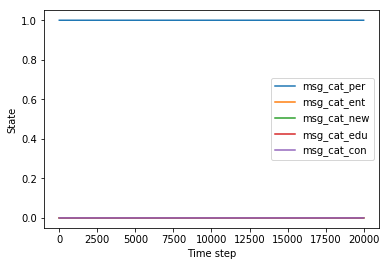

In [13]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

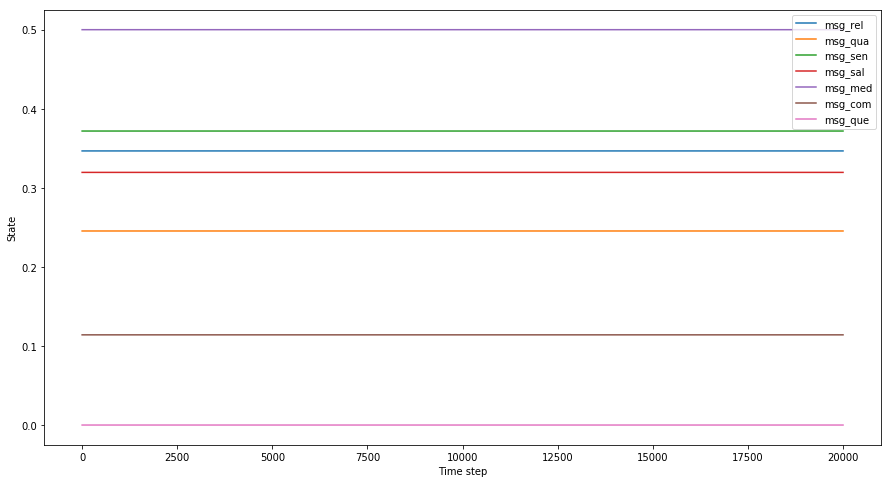

In [14]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

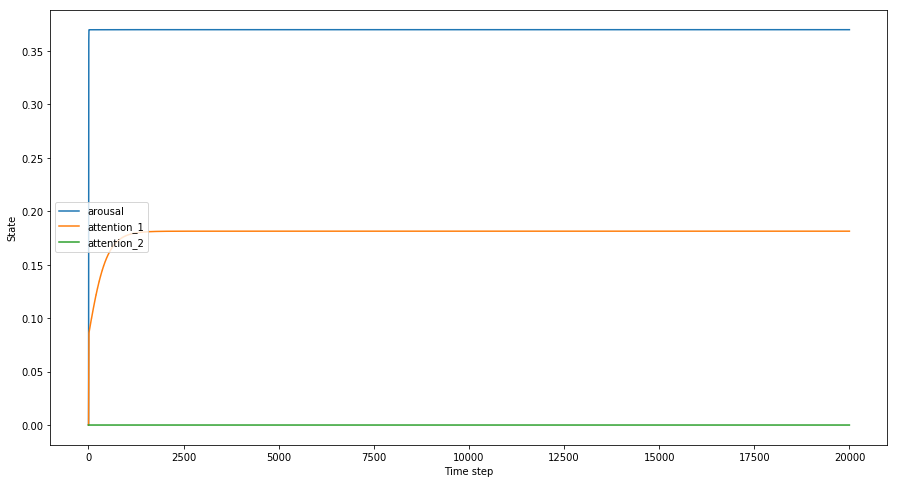

In [16]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

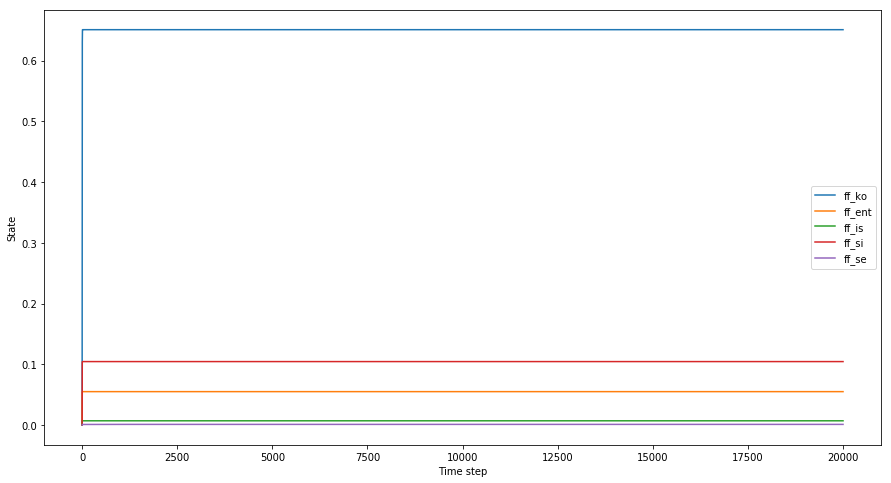

In [17]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction

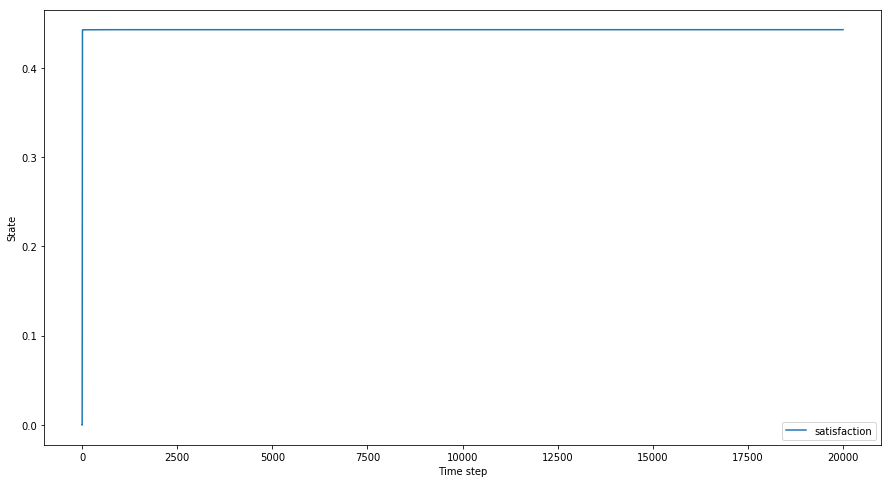

In [19]:
inputsDF[['satisfaction']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

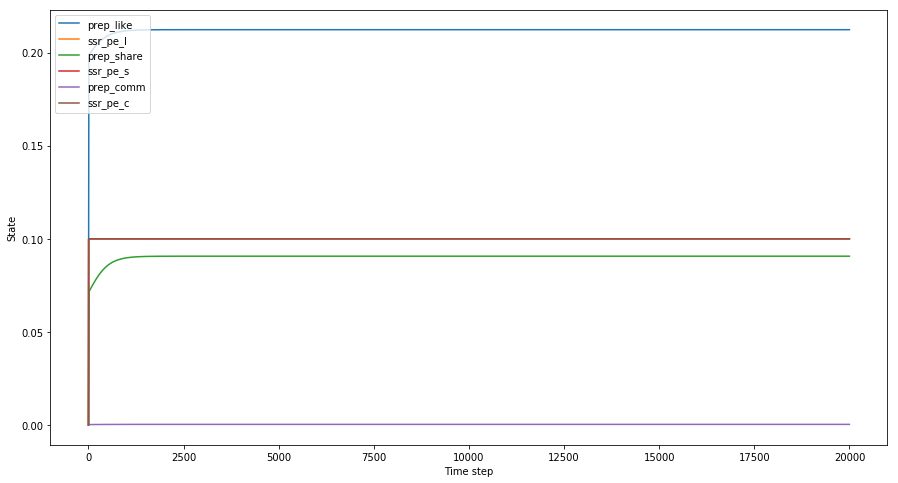

In [20]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

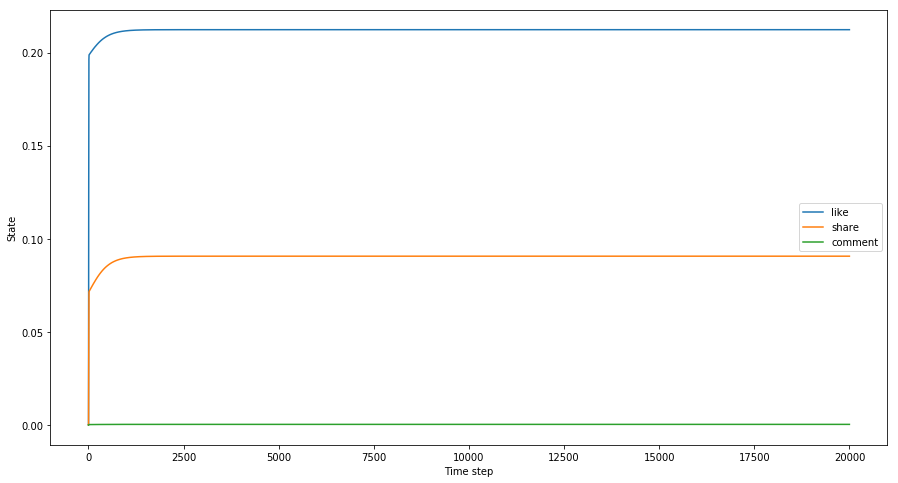

In [21]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

# Agent 2

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 3

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns